In [386]:

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
with tf.device("/gpu:0"):
    np.random.seed(3)
    tf.random.set_seed(3)

In [387]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [388]:
tf.__version__

'2.7.0'

In [389]:
x_train = train.drop('label', axis=1, inplace=False)
y_train = train['label']

In [390]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
y_train = y_train.values.reshape(-1, 1)

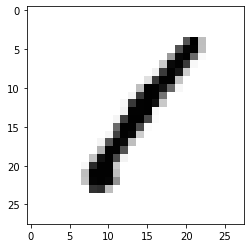

In [391]:
plt.imshow(x_train[0], cmap='Greys', interpolation='None')

In [392]:
x_test = test
x_test = x_test.values.reshape(-1, 1)

In [393]:
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [394]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
#model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
#model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [395]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 3136)              0         
                                                                 
 dense_75 (Dense)            (None, 256)             

In [396]:
batch_size = 32
epochs = 10

In [397]:
train_datagen = ImageDataGenerator(
        rescale=1./255.,
        width_shift_range=0.2,
        zoom_range=0.2,
        validation_split=0.2
)

In [398]:
training_set = train_datagen.flow(x_train, y_train, shuffle=True, batch_size=batch_size, subset='training')

validation_set = train_datagen.flow(x_train, y_train, batch_size=batch_size, subset='validation')

In [399]:
training_set.n

33600

In [400]:
model.compile(optimizers.rmsprop(lr=0.0001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy']
)

In [401]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)]
STEP_SIZE_TRAIN=training_set.n//batch_size
STEP_SIZE_VALID=validation_set.n//batch_size
history = model.fit_generator(generator=training_set,
                    epochs=epochs,
                    validation_data=validation_set,
                    validation_steps=STEP_SIZE_VALID,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    verbose=1,
                    callbacks=callbacks 
                )

C:\Users\newdm\AppData\Local\Temp/ipykernel_3808/4224861089.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=training_set,


Epoch 1/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.2994 - accuracy: 0.0987 - val_loss: 0.0855 - val_accuracy: 0.0995
Epoch 2/10
1050/1050 [==============================] - 18s 18ms/step - loss: 0.0992 - accuracy: 0.0982 - val_loss: 0.0838 - val_accuracy: 0.0963
Epoch 3/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0774 - accuracy: 0.0986 - val_loss: 0.0634 - val_accuracy: 0.0991
Epoch 4/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0621 - accuracy: 0.0984 - val_loss: 0.0753 - val_accuracy: 0.0983


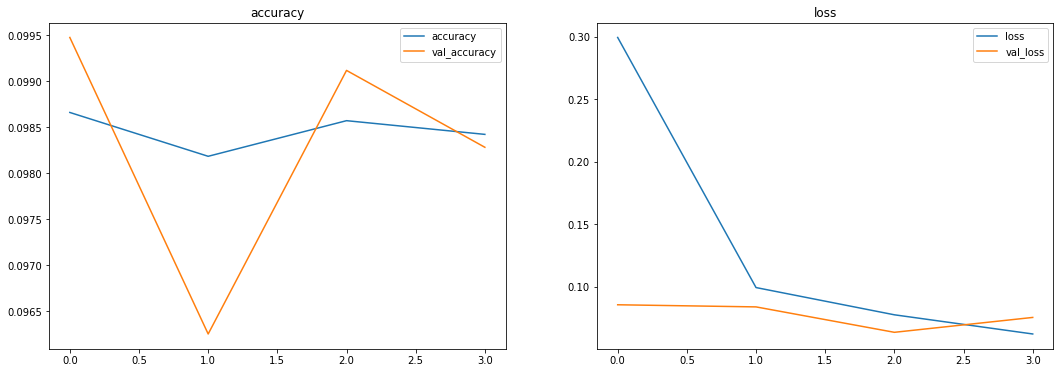

In [402]:
plt.figure(figsize=(18, 6))

# 에포크별 정확도
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("accuracy")
plt.legend()

# 에포크별 손실률
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()